Final Project

In [42]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [61]:
# Data Exploring
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [59]:
diabetes.shape

(253680, 22)

In [60]:
# Variables
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [44]:
any_na = diabetes.isna().any().any()
print(any_na)

False


In [45]:
diabetes2 = diabetes[diabetes['Diabetes_012'] != 1]
diabetes2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [57]:
diabetes2.describe()

,Diabetes_bin,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,...,249049.000000,249049.000000,249049.000000,249049.00000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000
mean,0.141924,0.425282,0.420463,0.962224,28.338813,0.442246,0.040261,0.093271,0.757995,0.634851,...,0.951162,0.083337,2.502761,3.15976,4.202916,0.166192,0.440391,8.012572,5.055379,6.066943
std,0.348973,0.494387,0.493634,0.190654,6.594030,0.496654,0.196571,0.290812,0.428298,0.481473,...,0.215529,0.276392,1.067308,7.38012,8.681035,0.372254,0.496435,3.058090,0.983375,2.066245
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.00000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.00000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [46]:
diabetes2["Diabetes_bin"] = diabetes2['Diabetes_012'].apply(lambda x:1 if x==2 else 0)
diabetes2 = diabetes2.drop(columns = "Diabetes_012")
diabetes2.head()

/var/folders/sz/q9hjmxf53tncbs3nh0z5hx0h0000gn/T/ipykernel_14847/2580224379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2["Diabetes_bin"] = diabetes2['Diabetes_012'].apply(lambda x:1 if x==2 else 0)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_bin
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0


In [47]:
# Bringing the last column to the first
last_col = diabetes2.columns[-1]  # Get the last column
diabetes2 = diabetes2[[last_col] + list(diabetes2.columns[:-1])] 
diabetes2.head()

,Diabetes_bin,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Text(0.5, 1.0, 'correlation of feature')

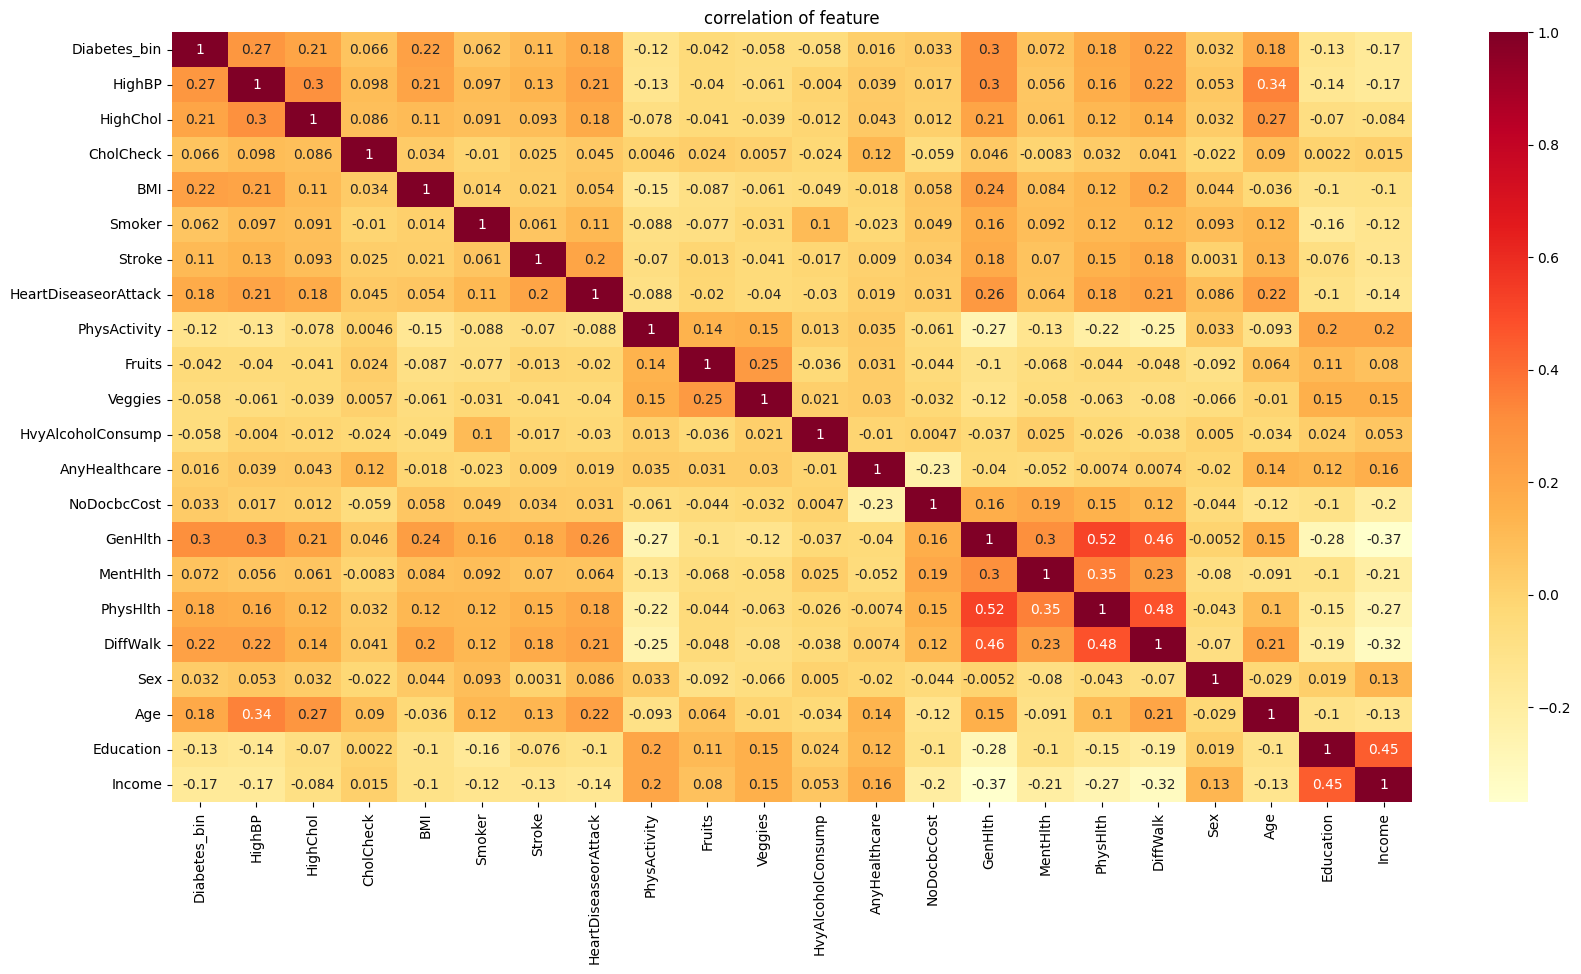

In [89]:
# Correlation Visualization
plt.figure(figsize = (20,10))
sns.heatmap(diabetes2.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [80]:
correlation_matrix = diabetes2.corr().iloc[0]
print(correlation_matrix)

Diabetes_bin            1.000000
HighBP                  0.269319
HighChol                0.205684
CholCheck               0.066037
BMI                     0.222353
Smoker                  0.062212
Stroke                  0.107990
HeartDiseaseorAttack    0.181258
PhysActivity           -0.121028
Fruits                 -0.041736
Veggies                -0.058109
HvyAlcoholConsump      -0.057940
AnyHealthcare           0.016241
NoDocbcCost             0.033152
GenHlth                 0.300347
MentHlth                0.071751
PhysHlth                0.175754
DiffWalk                0.223991
Sex                     0.031728
Age                     0.181727
Education              -0.128149
Income                 -0.168651
Name: Diabetes_bin, dtype: float64


In [81]:
# Top 11 variables (half of the variables)
sorted_row = correlation_matrix.abs().sort_values(ascending=False)
sorted_row.head(12)

Diabetes_bin            1.000000
GenHlth                 0.300347
HighBP                  0.269319
DiffWalk                0.223991
BMI                     0.222353
HighChol                0.205684
Age                     0.181727
HeartDiseaseorAttack    0.181258
PhysHlth                0.175754
Income                  0.168651
Education               0.128149
PhysActivity            0.121028
Name: Diabetes_bin, dtype: float64

After running correlation of the variables, we found that **GenHlth**, **HighBP**, **DiffWalk**, **BMI**, and **HighChol** have highest correlation with the Diabetes_012 (after dropping prediabetes).

In [97]:
top_half = diabetes2[["Diabetes_bin", "GenHlth", "HighBP", "DiffWalk", "BMI", "HighChol", "Age", "HeartDiseaseorAttack", "PhysHlth", "Income", "Education", "PhysActivity"]]
top_half.head()

,Diabetes_bin,GenHlth,HighBP,DiffWalk,BMI,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Income,Education,PhysActivity
0,0,5.0,1.0,1.0,40.0,1.0,9.0,0.0,15.0,3.0,4.0,0.0
1,0,3.0,0.0,0.0,25.0,0.0,7.0,0.0,0.0,1.0,6.0,1.0
2,0,5.0,1.0,1.0,28.0,1.0,9.0,0.0,30.0,8.0,4.0,0.0
3,0,2.0,1.0,0.0,27.0,0.0,11.0,0.0,0.0,6.0,3.0,1.0
4,0,2.0,1.0,0.0,24.0,1.0,11.0,0.0,0.0,4.0,5.0,1.0


In [68]:
x_variables = top_half.drop(columns = "Diabetes_bin")
x_variables

,GenHlth,HighBP,DiffWalk,BMI,HighChol
0,5.0,1.0,1.0,40.0,1.0
1,3.0,0.0,0.0,25.0,0.0
2,5.0,1.0,1.0,28.0,1.0
3,2.0,1.0,0.0,27.0,0.0
4,2.0,1.0,0.0,24.0,1.0
...,...,...,...,...,...
253675,3.0,1.0,0.0,45.0,1.0
253676,4.0,1.0,1.0,18.0,1.0
253677,1.0,0.0,0.0,28.0,0.0
253678,3.0,1.0,0.0,23.0,0.0


In [98]:
np.random.seed(420) # this makes the sampling reproducible, so everyone has same train and test
train = top_half.sample(frac = 0.8)
test = top_half.drop(index=train.index)
print(train.shape, test.shape)

(199239, 12) (49810, 12)


In [99]:
X_train = train.drop(columns = ['Diabetes_bin'])
y_train = train['Diabetes_bin']
X_test = test.drop(columns = ['Diabetes_bin'])
y_test = test['Diabetes_bin']

Score on train: 0.8587525534659379
Score on test: 0.855370407548685


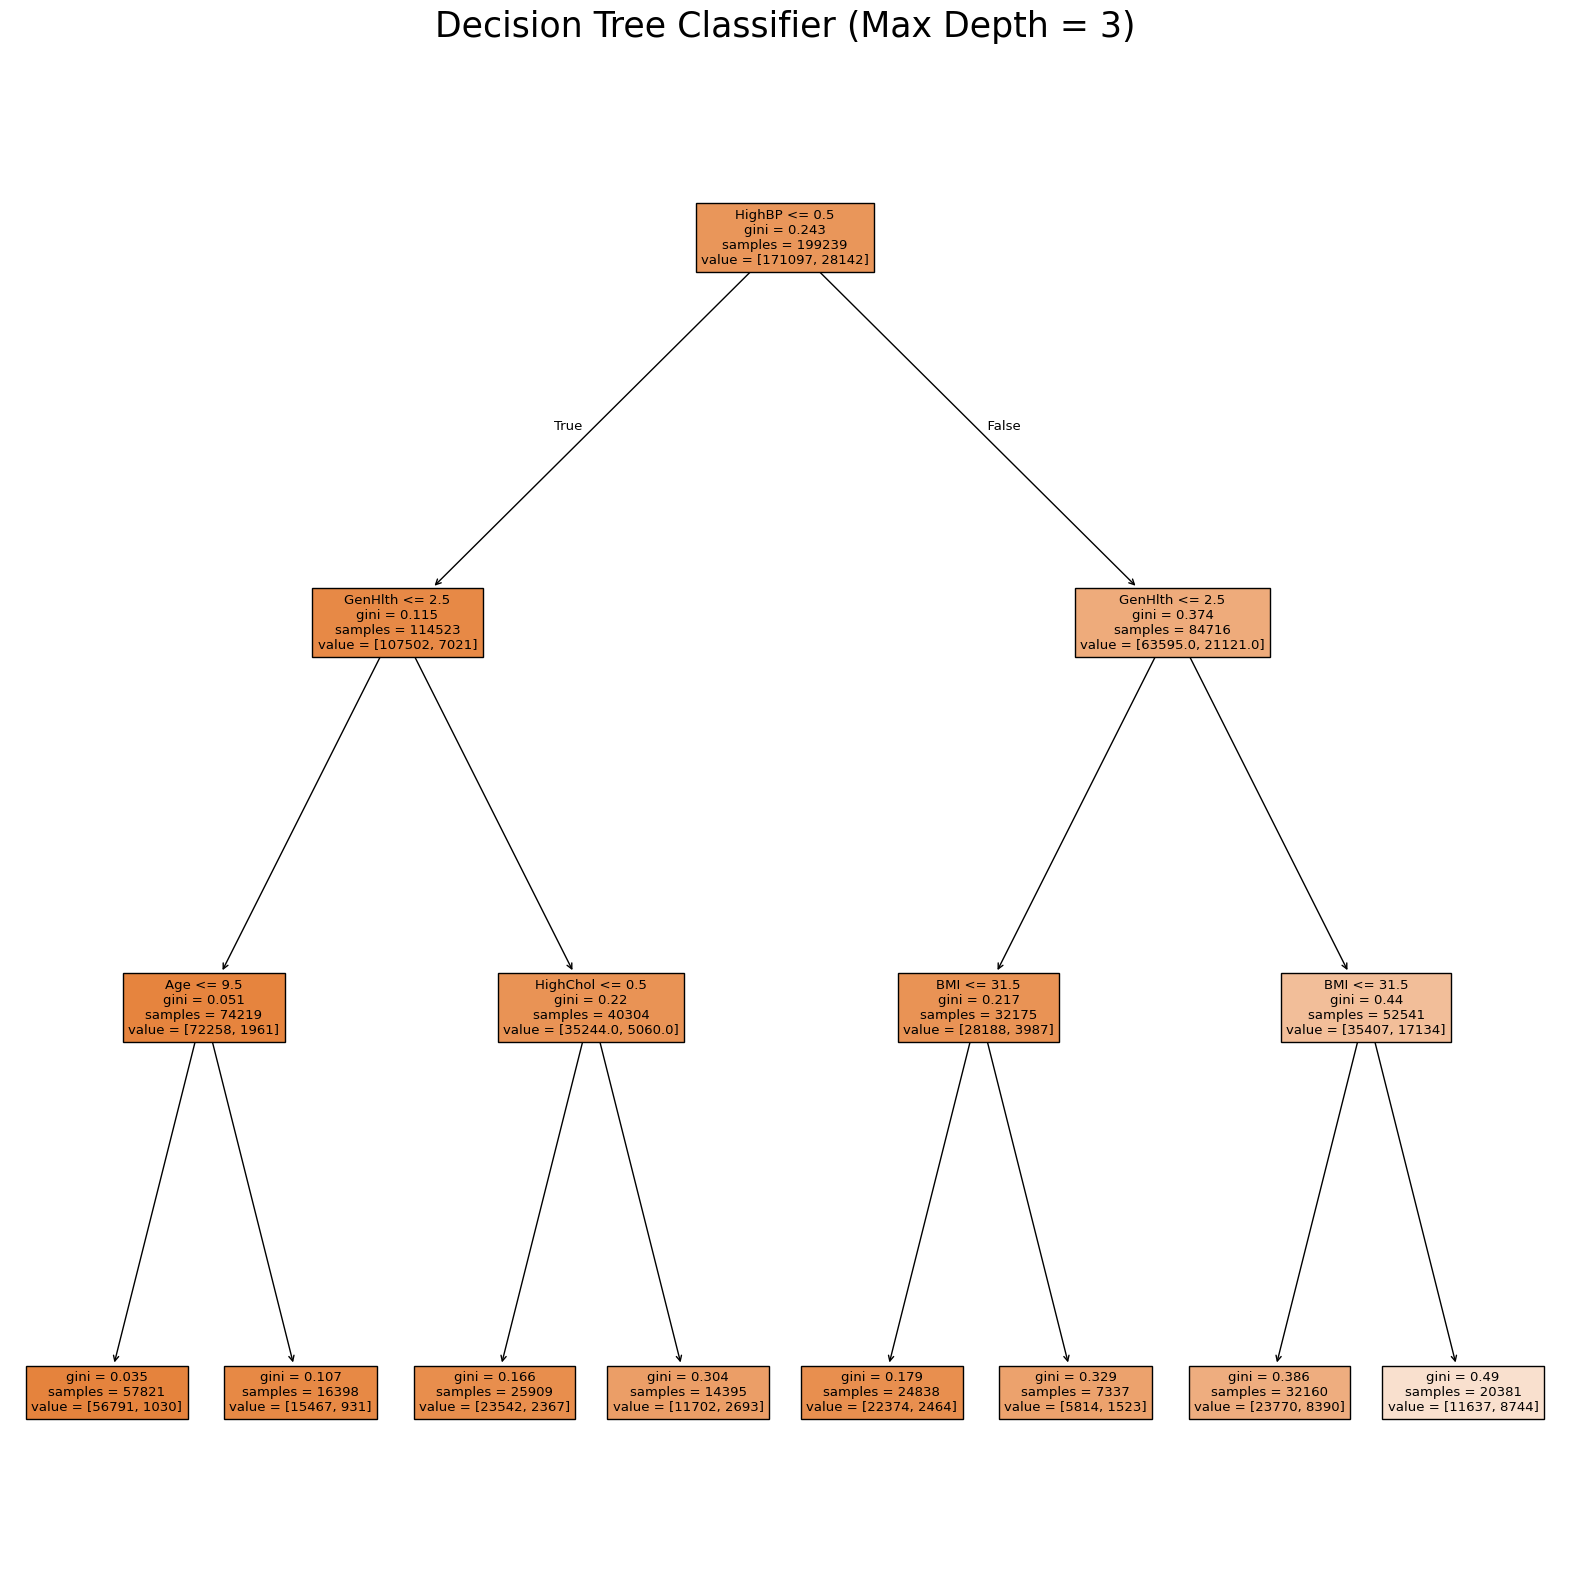

In [104]:
# Decision Tree Visualization
T = DecisionTreeClassifier(max_depth=3)
T.fit(X_train, y_train)
train_score = T.score(X_train, y_train)
test_score = T.score(X_test, y_test)
print('Score on train:', train_score)
print('Score on test:', test_score)

fig, ax = plt.subplots(1, figsize = (20, 20))
p = plot_tree(T, filled = True, feature_names = X_train.columns)

ax.set_title("Decision Tree Classifier (Max Depth = 3)", fontsize=25)
plt.show()

The decision tree tells us that the most informative variable is HighBP.

Text(0.5, 1.0, 'Prediction Scores at Different Max Tree Depths')

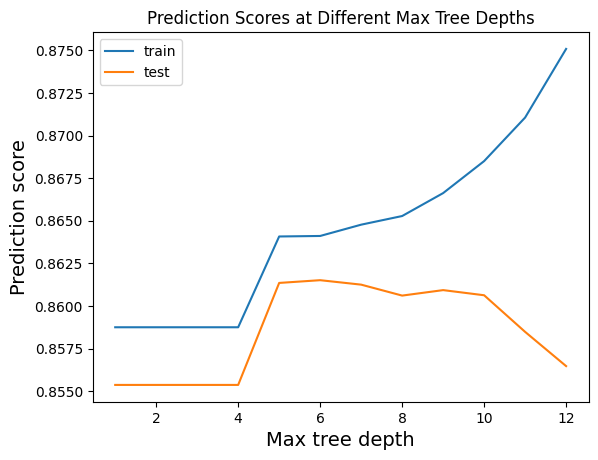

In [102]:
# Prediction scores at different max tree depths
train_scores=[]
test_scores=[]
r=range(1,13)
for i in r:
    T = DecisionTreeClassifier(max_depth=i)
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))
fig, ax = plt.subplots(1)
sns.lineplot(x=r,y=train_scores,label='train')
sns.lineplot(x=r,y=test_scores,label='test')
ax.set_ylabel('Prediction score', fontsize=14)
ax.set_xlabel('Max tree depth', fontsize=14)
ax.legend()
ax.set_title("Prediction Scores at Different Max Tree Depths")

Best prediction score would be 5 or 6 max tree depth. However, because the test score only varies from approximately 0.855 to 0.862, it doesn't make much difference from using max tree depth of 3. 